# Osnovna klasifikacija: Skup podataka `Fashion MNIST`

In [1]:
# Ucitavamo tensorflow
import tensorflow as tf
# Ucitavamo keras
from tensorflow import keras

# Pomocne biblioteke
import numpy as np
import matplotlib.pyplot as plt

# Korisno ako koristite tamnu temu, slike ce se bolje videti.
plt.style.use('dark_background')

# Korisno je uvek ostaviti ispisane verzije biblioteka koje su koriscene kako bi
# drugi ljudi imali tu informaciju pri pokretanju vasih sveski.
print(tf.__version__)

2.8.2


## Skup podataka `Fashion MNIST`

Ovaj primer koristi [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) skup podataka koji sadrži 70,000 crno belih slika koje su
podeljene u 10 kategorija. Jedna slika sadrži jedan komad odeće ili obuće.
Rezolucija slike je $28 \times 28$ piksela.

Fashion MNIST je namenjen kao zamena za tradicionalni [MNIST](http://yann.lecun.com/exdb/mnist/) skup podataka koji se ranije često koristio kao prvi
ilustrativni skup podataka za klasifikaciju (sa slikama). `MNIST` sadrži
slike rukom pisanih cifara u vrlo sličnom formatu kao prethodno opisano
za `Fashion MNIST`.

U ovom primeru ćemo koristiti 60,000 slika da obučimo mrežu, a ostalih 10,000 slika da evaluiramo koliko precizno je naša mreža klasifikovala slike.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Funkcija vraca dva uredjena para kod kojih je prvi element niz
# slika, a drugi element niz labela za slike.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Analiza skupa podataka

Pogledajmo malo skup podataka detaljnije.

Na primer, postoji 60,000 instanci u skupu za obučavanje čija je
rezolucija $28 \times 28$. Nizovi iz biblioteke `numpy` imaju svoj *oblik*
(eng. shape) koji definišu njihovu dimenzionalnost.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

Svaka labela je ceo broj iz intervala [0, 9].

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Postoji 10,000 slika u skupu za obučavanje. Takođe, slike su rezolucije
$28 \times 28$.


In [8]:
test_images.shape

(10000, 28, 28)

Skup za testiranje takođe treba da sadrži 10,000 labela.

In [9]:
len(test_labels)

10000

## Pretprocesiranje podataka

Pretprocesiranje podataka predstavlja važan korak u većini primena u okviru
problema klasifikacije (i regresije). Oblik u kome dobijemo podatko često
nije dovoljno pogodan za algoritme koje želimo da koristimo te je potrebno
izvršiti određene transformacije kako bi se to nadomestilo.

Treba pažljivo uraditi analizu skupa podataka koji se koristi jer taj korak
često definiše dalje korake - kao što su pretprocesiranje i odabir algoritama.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Možemo proveriti da li su slike u korektnom formatu. Na primer, možemo
nacrtati prvih 25 slika iz skupa za obučavanje i prikazati ime klase
ispod svake slike.

SAVET: Često je potrebno crtati mrežu slika dimenzija $A \times B$,
zapamtite kako se ovo radi.

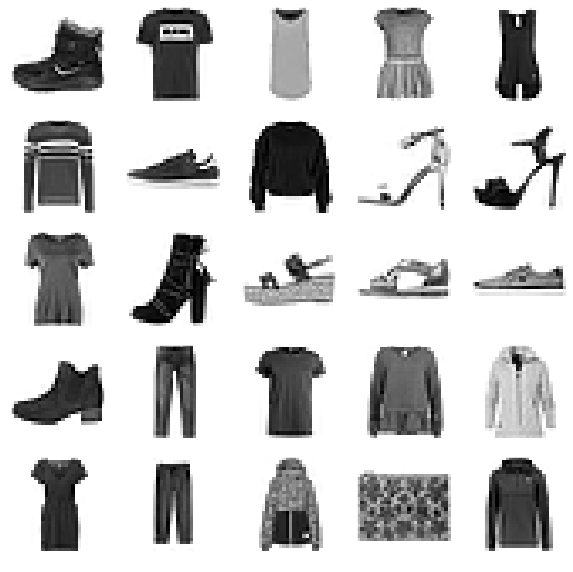

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Definisanje slojeva

Sloj (eng. layer) je osnovni termin i element koji se koristi za definisanje
arhitekture mreže. Postoje razni slojevi, ali ono što im je uglavnom svima
zajedničko je da vrše neku transformaciju podataka sa ulaza i transformisani
rezultat prosleđuju na izlaz.


`tf.keras.layers.Flatten` će prosleđeni oblik podataka izravnati, odnosno u
našem slujačaju će dimenziju $28 \times 28$ pretvoriti u 784.

`tf.keras.layers.Dense` će nam omogućiti da definišemo potpuno povezani sloj
neurona sa njihovim težinama i aktivacijama.


`tf.keras.Sequential` je objekat koji konstruišemo iz liste slojeva koji
definišu arhitekturu naše mreže.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
print(train_labels.shape)
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)
print(train_labels_cat.shape)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

(60000,)
(60000, 10)


In [14]:
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4976 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8797
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9030
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

### Evaluacija tačnosti

Želimo da vidimo kako se model ponaša na skupu za testiranje.

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_cat, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3467 - accuracy: 0.8824 - 953ms/epoch - 3ms/step

Test accuracy: 0.8823999762535095


Možemo primetiti da je tačnost na skupu za testiranje niža nego na skupu
za obučavanje. To je često odlika situacije u kojoj se desilo
preprilagođavanje (eng. overfitting). Preprilagođavanje je situacija
u kojoj je model počeo da uči i neke odlike u podacima koje nisu korisne
za rešavanje problema, na primer šum. Rešavanje problema preprilagođavanja
nije trivijalno u smislu da postoji jasan algoritam koji trepa ispratiti
da bi problem nestao, ali često se svodi na neke stvari poput:

- Koristiti jednostavniji model
- Koristiti regularizaciju
- Ažurirate proces obučavanja
- i slično.

### Korišćenje modela

Nakon što je model obučen, možemo da ga koristimo za predikcije na slikama.


In [16]:
predictions = model.predict(test_images)

Model je predvideo kategoriju za svaku sliku iz skupa za testiranje.

Pogledajmo predikcije za prvu sliku.

In [17]:
predictions[0]

array([1.1821070e-09, 3.9795159e-12, 1.4749996e-09, 6.6620237e-11,
       2.2854729e-10, 3.3421769e-05, 5.0974256e-09, 6.8170129e-04,
       1.1907247e-08, 9.9928492e-01], dtype=float32)

Primetimo da je dobijen niz od 10 brojeva koji predstavljaju ocenu sigurnosti
modela o pripadnosti instance odredjenoj klasi. Određivanje kategorije kojoj
pripada instanca se može uraditi tako što se odredi indeks u ovom nizu
koji ima najveću vrednost.


In [18]:
np.argmax(predictions[0])

9

A to je klasa...

In [19]:
ix = np.argmax(predictions[0])
print(class_names[ix])

Ankle boot


Dakle model misli da je u pitanju kategoriju `Ankle Boot`. Ako pogledamo
u podacima možemo zaključiti da je model u pravu jer je na poslednjoj
poziciji (indeks 0) vrednost 1.

In [20]:
test_labels[0]

9

Definisaćemo dve korisne funkcije za bolju ilustraciju rada modela.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Vizuelni prikaz predikcija

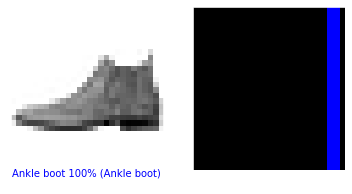

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

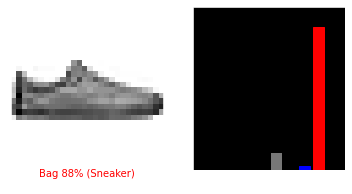

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Nacrtajmo nekoliko slika na sličan način.

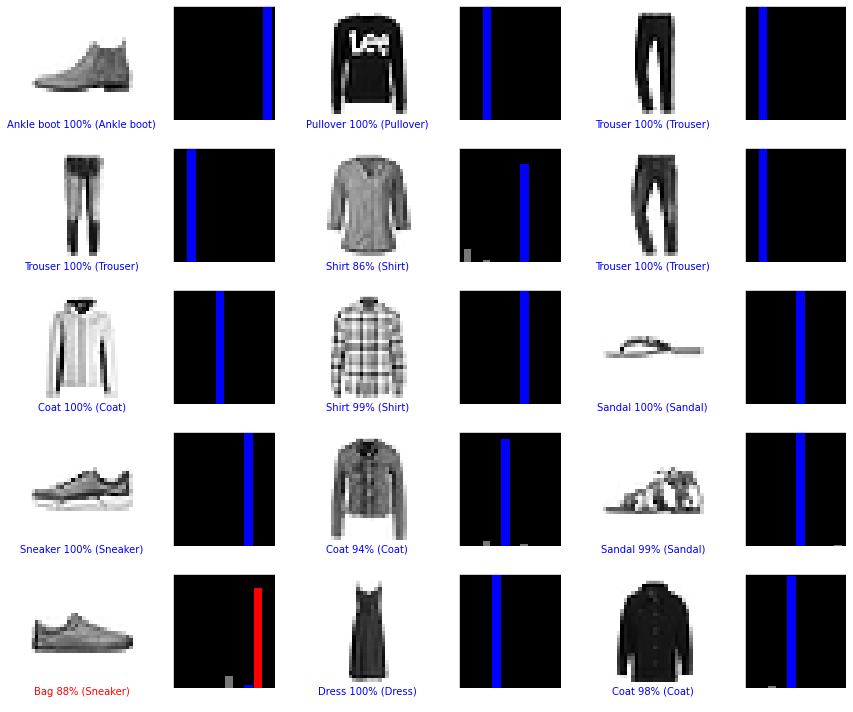

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Korišćenje modela

Šta ukoliko želimo da predvidimo klasu nad jednom slikom?

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` modeli su optimizovani da radi predikcije na podskupu podataka
(eng. batch) u jednom prolazu (pogledajte prethodni primer gde smo dobili
predikcije nad **celim** skupom za testiranje). Usled toga neophodno je
(28, 28) prebaciti u oblik (1, 28, 28). Možete smatrati da je prva dimenzija
broj koji označava broj instanci koji se prosleđuje mreži.


In [26]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Vršimo predikciju nad slikom.

In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1015377e-05 3.3912703e-13 9.9598807e-01 2.1128168e-09 3.0451228e-03
  2.8859298e-12 9.3575794e-04 1.2805123e-18 8.4247276e-11 4.6957165e-15]]


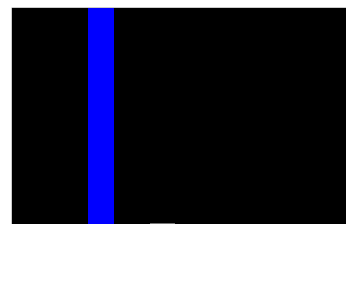

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` nam vraća listu listi (usled rada na nivou podskupa)
pa ćemo uzeti prvi element te liste.


In [29]:
np.argmax(predictions_single[0])

2